### This is a Tutorial Notebook to get started with CTO as soon as possible, without any frills
- We will be attempting to view news headlines scraped from google
- Prequisites:
    - pip install all requirements as in the requirements.txt
    - Navigate to https://zenodo.org/doi/10.5281/zenodo.11535960 (this link always resolves to the latest version), and download the latest version of CTO! 
    I downloaded the v0.3 supplementary.zip, and unzipped it in the parent directory.
        ```bash
        wget https://zenodo.org/records/11608615/files/supplementary.zip -P ../
        unzip ../supplementary.zip -d ../
        ```
    - Follow the setup instructions in news_headlines
        - I.e. Go to https://aact.ctti-clinicaltrials.org/download and download the latest version of the pipe-delimited files, and extract it in the parent folders as ../CTTI/ 
        - ```bash
            git clone https://github.com/ranahaani/GNews ../news_headlines/GNews
            ```

In [5]:
# ============ loading the zipped data, viewing all collected news headlines ============
import numpy as np
import pandas as pd
import os
import glob

news_df = pd.read_csv('../supplementary/news_headlines/news.csv')
news_df

,date,title,description,publisher,ticker,sentiment,sentiment_prob,company
0,2021-11-04 07:00:00,2seventy bio Completes Spin Transaction and La...,2seventy bio Completes Spin Transaction and La...,Business Wire,TSVT,Positive,0.941116,2seventy bio
1,2021-11-08 08:00:00,bluebird bio splits to create new oncology fir...,bluebird bio splits to create new oncology fir...,PMLiVE,TSVT,Neutral,0.913952,2seventy bio
2,2021-11-05 07:00:00,bluebird bio Completes Oncology Spin-Off Busin...,bluebird bio Completes Oncology Spin-Off Busin...,BioSpace,TSVT,Neutral,0.999632,2seventy bio
3,2021-11-04 07:00:00,bluebird bio completes spin-off of cell therap...,bluebird bio completes spin-off of cell therap...,Seeking Alpha,TSVT,Neutral,0.999688,2seventy bio
4,2021-11-05 07:00:00,"With oncology spinoff done, bluebird bio moves...","With oncology spinoff done, bluebird bio moves...",FiercePharma,TSVT,Positive,0.999980,2seventy bio
...,...,...,...,...,...,...,...,...
1115012,2024-03-07 09:51:07,Earnings call: Zymeworks outlines robust clini...,Earnings call: Zymeworks outlines robust clini...,Investing.com Canada,ZYME,Positive,1.000000,zymeworks inc.
1115013,2024-03-22 16:00:10,Zymeworks (ZYME) Upgraded to Buy: What Does It...,Zymeworks (ZYME) Upgraded to Buy: What Does It...,Yahoo Finance,ZYME,Positive,1.000000,zymeworks inc.
1115014,2024-03-13 08:37:44,AQR Capital Management LLC Has $5.07 Million H...,AQR Capital Management LLC Has $5.07 Million H...,Defense World,ZYME,Neutral,0.999955,zymeworks inc.
1115015,2024-03-09 08:00:00,Connor Clark & Lunn Investment Management Ltd....,Connor Clark & Lunn Investment Management Ltd....,Defense World,ZYME,Neutral,0.999782,zymeworks inc.


In [12]:
# ============ view logs of all scraped headlines, 
# note that the web scraping code is in 
# ../news_headlines/get_news.py ============
import sys
sys.path.append('../news_headlines/')
sys.path.append('../news_headlines/GNews/')
import json
from get_news import convert_to_datetime

print('Processing news data')

log_dir = '../supplementary/news_headlines/news_logs/'
all_company_dfs = []
for company in sorted(os.listdir(log_dir)):
    with open(os.path.join(log_dir, company), 'rb') as f:
        news = json.load(f)
    # print(company, ticker, news)

    all_titles = []
    all_descriptions = []
    all_dates = []
    all_publishers = []
    for k in news.keys():
        if len(news[k]) > 0:
            for i in range(len(news[k])):
                date = convert_to_datetime(news[k][i]['published date'])
                all_dates.append(date)
                all_titles.append(news[k][i]['title'])
                all_descriptions.append(news[k][i]['description'])
                all_publishers.append(news[k][i]['publisher']['title'])

    df = pd.DataFrame({'date': all_dates, 'title': all_titles, 'description': all_descriptions, 'publisher': all_publishers})
    df['company'] = company
    all_company_dfs.append(df)
all_company_dfs = pd.concat(all_company_dfs)

### ============ Note that sentiments and news title 
# embeddings are processed in get_news.py, but not 
# included in this script ============
all_company_dfs

Processing news data


/tmp/ipykernel_3053682/2522547672.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_company_dfs = pd.concat(all_company_dfs)


,date,title,description,publisher,company
0,2021-11-04 07:00:00,2seventy bio Completes Spin Transaction and La...,2seventy bio Completes Spin Transaction and La...,Business Wire,2seventy bio.json
1,2021-11-08 08:00:00,bluebird bio splits to create new oncology fir...,bluebird bio splits to create new oncology fir...,PMLiVE,2seventy bio.json
2,2021-11-05 07:00:00,bluebird bio Completes Oncology Spin-Off Busin...,bluebird bio Completes Oncology Spin-Off Busin...,BioSpace,2seventy bio.json
3,2021-11-04 07:00:00,bluebird bio completes spin-off of cell therap...,bluebird bio completes spin-off of cell therap...,Seeking Alpha,2seventy bio.json
4,2021-11-05 07:00:00,"With oncology spinoff done, bluebird bio moves...","With oncology spinoff done, bluebird bio moves...",FiercePharma,2seventy bio.json
...,...,...,...,...,...
186,2024-03-07 09:51:07,Earnings call: Zymeworks outlines robust clini...,Earnings call: Zymeworks outlines robust clini...,Investing.com Canada,zymeworks inc..json
187,2024-03-22 16:00:10,Zymeworks (ZYME) Upgraded to Buy: What Does It...,Zymeworks (ZYME) Upgraded to Buy: What Does It...,Yahoo Finance,zymeworks inc..json
188,2024-03-13 08:37:44,AQR Capital Management LLC Has $5.07 Million H...,AQR Capital Management LLC Has $5.07 Million H...,Defense World,zymeworks inc..json
189,2024-03-09 08:00:00,Connor Clark & Lunn Investment Management Ltd....,Connor Clark & Lunn Investment Management Ltd....,Defense World,zymeworks inc..json


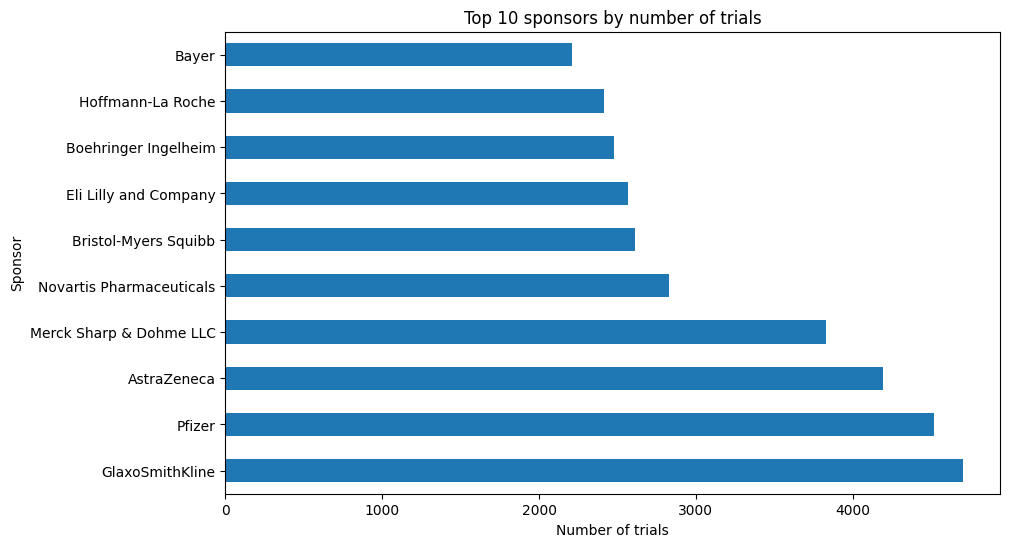

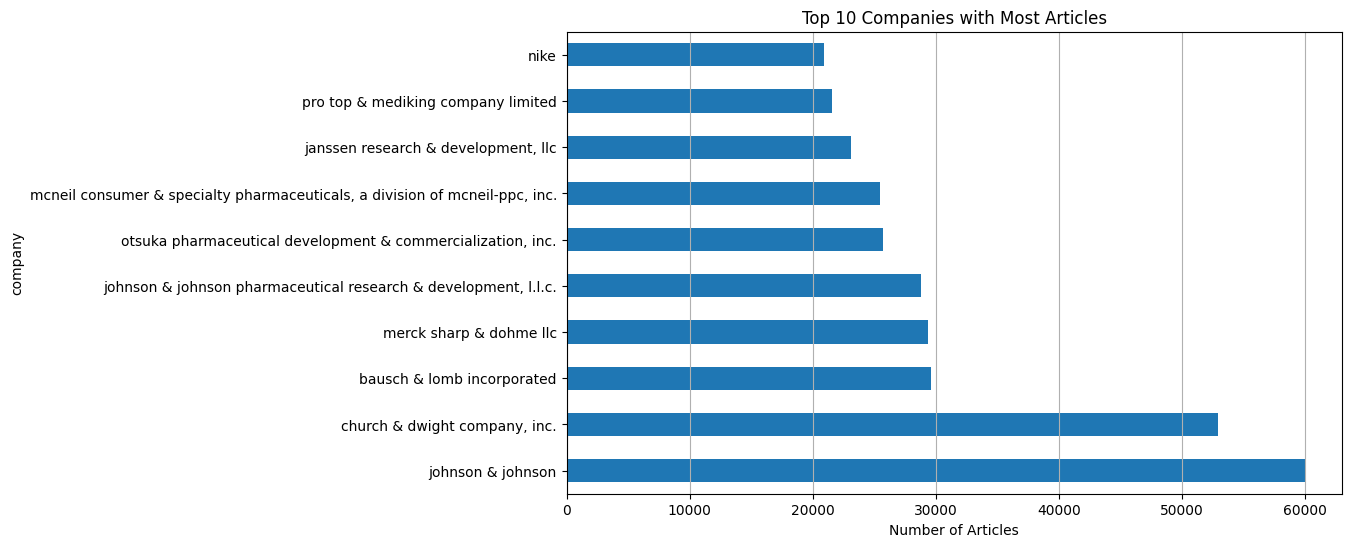

In [31]:
# ============ We note that the website scraping is not perfect, 
# as the companies with the 10 most headlines do not correspond 
# to the top 10 most sponsored headlines. Further research is 
# needed to obtain more relevant headlines ============
import matplotlib.pyplot as plt

sponsors = pd.read_csv('../CTTI/sponsors.txt', sep='|')
sponsors = sponsors[sponsors['agency_class']=='INDUSTRY']
# plot top 10 sponsors by number of trials
plt.figure(figsize=(10, 6))
sponsors.groupby('name').size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel('Number of trials')
plt.ylabel('Sponsor')
plt.title('Top 10 sponsors by number of trials')
plt.show()

# plot top 10 companies with most articles
plt.figure(figsize=(10, 6))
news_df.groupby('company').size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel('Number of Articles')
plt.title('Top 10 Companies with Most Articles')
plt.grid(axis='x')
plt.show()

In [33]:
# ============ taking a look at the corresponded studies with news headlines ============
study_news_df = pd.read_csv('../supplementary/news_headlines/studies_with_news.csv')
study_news_df

/tmp/ipykernel_3053682/3845673510.py:2: DtypeWarning: Columns (53,68) have mixed types. Specify dtype option on import or set low_memory=False.
  study_news_df = pd.read_csv('../supplementary/news_headlines/studies_with_news.csv')


,nct_id,nlm_download_date_description,study_first_submitted_date,results_first_submitted_date,disposition_first_submitted_date,last_update_submitted_date,study_first_submitted_qc_date,study_first_posted_date,study_first_posted_date_type,results_first_submitted_qc_date,...,top_10_sim,top_9_sim,top_8_sim,top_7_sim,top_6_sim,top_5_sim,top_4_sim,top_3_sim,top_2_sim,top_1_sim
0,NCT00170833,NaN,2005-09-09,NaN,NaN,2011-11-01,2005-09-09,2005-09-15,Estimate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCT00170872,NaN,2005-09-09,NaN,NaN,2012-05-18,2005-09-09,2005-09-15,Estimate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NCT00170911,NaN,2005-09-09,NaN,NaN,2011-11-01,2005-09-09,2005-09-15,Estimate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NCT00170989,NaN,2005-09-10,NaN,NaN,2011-11-07,2005-09-10,2005-09-15,Estimate,NaN,...,-11.293562,-11.267359,-11.263872,-11.262279,-11.221527,-11.280987,-11.165817,-11.252186,-11.104816,-11.285854
4,NCT00171028,NaN,2005-09-10,NaN,NaN,2011-11-07,2005-09-10,2005-09-15,Estimate,NaN,...,-11.324189,-11.309721,-11.262646,-10.488545,-11.230076,-11.258699,-11.229609,-11.300865,-11.299486,-11.302795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87369,NCT03002077,NaN,2016-12-21,2019-12-06,NaN,2020-06-19,2016-12-21,2016-12-23,Estimate,2020-06-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87370,NCT01310244,NaN,2011-02-28,NaN,NaN,2020-01-02,2011-03-04,2011-03-08,Estimate,NaN,...,-11.304576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87371,NCT03703505,NaN,2018-05-24,NaN,NaN,2018-10-10,2018-10-10,2018-10-12,Actual,NaN,...,-10.626383,-9.987629,-8.384491,-9.934877,-10.605787,-10.748440,-8.260455,-9.900265,-10.252007,-6.115884
87372,NCT00170755,NaN,2005-09-09,NaN,NaN,2008-01-15,2005-09-09,2005-09-15,Estimate,NaN,...,-11.259165,-11.297543,-11.301447,-11.271033,-11.307616,-11.299872,-11.306049,-11.275604,-11.184555,-11.310751


In [61]:
# sanity check to see if the news headlines are relevant to the studies
study_news_df = pd.read_csv('../supplementary/news_headlines/studies_with_news.csv')
study_news_df = study_news_df[study_news_df['top_1_sim']>0]
study_news_df['top1_news_title'] = study_news_df['top_1'].apply(lambda x: news_df.iloc[int(x)]['title'] if x>=0 else None)

# randomly sample 10 studies to see if the news headlines are relevant
np.random.seed(0)
inds = np.random.choice(len(study_news_df), 10, replace=False)
for i in inds:
    print(i, 'Study:', study_news_df.iloc[i]['nct_id'])
    print('Study title:', study_news_df.iloc[i]['title2'])
    print('Top 1 news title:', study_news_df.iloc[i]['top1_news_title'])
    print('Top 1 similarity:', study_news_df.iloc[i]['top_1_sim'])
    print()
# seems reasonable

/tmp/ipykernel_3053682/1987448490.py:2: DtypeWarning: Columns (53,68) have mixed types. Specify dtype option on import or set low_memory=False.
  study_news_df = pd.read_csv('../supplementary/news_headlines/studies_with_news.csv')


4816 Study: NCT00906698
Study title: BIBW 2992 low (20mg) dosage BIBW 2992 medium (40mg) dosage BIBW 2992 high (50mg) dosage Vinorelbine per os 60 mg/m² Vinorelbine per os 80 mg/m² Vinorelbine i.v. 25 mg/m² Neoplasms
Top 1 news title: Volasertib for Treatment of Acute Myeloid Leukaemia (AML) - Clinical Trials Arena
Top 1 similarity: 4.97046

4392 Study: NCT05239624
Study title: Enfortumab vedotin Pembrolizumab Urothelial Carcinoma
Top 1 news title: Enfortumab Vedotin Plus Pembrolizumab in Cisplatin-Ineligible Patients With Advanced Urothelial Cancer - The ASCO Post
Top 1 similarity: 6.5560293

1700 Study: NCT04686773
Study title: AZD1222 rAd26-S COVID-19
Top 1 news title: COVID-19 Booster Vaccine Approved - Loop PNG
Top 1 similarity: 0.36762875

914 Study: NCT00615056
Study title: Bevacizumab (avastin) FOLFIRI (Irinotecan, leucovorin, 5-fluorouracil [5FU]) AG-013736 (axitinib) FOLFOX (oxaliplatin, leucovorin, 5-fluorouracil [5FU]) AG-013736 (axitinib) FOLFIRI (irinotecan, leucovorin, 5